In [38]:
import numpy as np
import numpy.linalg as la
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sn

In [3]:
data = pd.read_csv('fredgraph copy.csv')

In [4]:
data

,date,y10,y3,y20,y7,y5,y2,y1,m6,m3
0,1962-01-02,4.06,3.70,4.07,.,3.88,.,3.22,.,.
1,1962-01-03,4.03,3.70,4.07,.,3.87,.,3.24,.,.
2,1962-01-04,3.99,3.69,4.06,.,3.86,.,3.24,.,.
3,1962-01-05,4.02,3.71,4.07,.,3.89,.,3.26,.,.
4,1962-01-08,4.03,3.71,4.08,.,3.91,.,3.31,.,.
...,...,...,...,...,...,...,...,...,...,...
15335,2020-10-13,0.74,0.18,1.29,0.52,0.31,0.16,0.13,0.12,0.11
15336,2020-10-14,0.73,0.18,1.28,0.51,0.30,0.14,0.13,0.12,0.12
15337,2020-10-15,0.74,0.18,1.29,0.52,0.32,0.14,0.12,0.12,0.11
15338,2020-10-16,0.76,0.18,1.30,0.53,0.32,0.14,0.12,0.12,0.11


In [11]:
data[data['date'] == '1990-01-01']

,date,y10,y3,y20,y7,y5,y2,y1,m6,m3
7304,1990-01-01,.,.,.,.,.,.,.,.,.


In [14]:
data_split = data.iloc[7304:]
data_split

,date,y10,y3,y20,y7,y5,y2,y1,m6,m3
7304,1990-01-01,.,.,.,.,.,.,.,.,.
7305,1990-01-02,7.94,7.90,7.97,7.98,7.87,7.870,7.810,7.89,7.83
7306,1990-01-03,7.99,7.96,8.02,8.04,7.92,7.940,7.850,7.94,7.89
7307,1990-01-04,7.98,7.93,8.01,8.02,7.91,7.920,7.820,7.90,7.84
7308,1990-01-05,7.99,7.94,8.03,8.03,7.92,7.900,7.790,7.85,7.79
...,...,...,...,...,...,...,...,...,...,...
15335,2020-10-13,0.74,0.18,1.29,0.52,0.31,0.16,0.13,0.12,0.11
15336,2020-10-14,0.73,0.18,1.28,0.51,0.30,0.14,0.13,0.12,0.12
15337,2020-10-15,0.74,0.18,1.29,0.52,0.32,0.14,0.12,0.12,0.11
15338,2020-10-16,0.76,0.18,1.30,0.53,0.32,0.14,0.12,0.12,0.11


In [15]:
data_split.index

RangeIndex(start=7304, stop=15340, step=1)

In [18]:
data_content = data_split[data_split['y10'] != '.']
data_content

,date,y10,y3,y20,y7,y5,y2,y1,m6,m3
7305,1990-01-02,7.94,7.90,7.97,7.98,7.87,7.870,7.810,7.89,7.83
7306,1990-01-03,7.99,7.96,8.02,8.04,7.92,7.940,7.850,7.94,7.89
7307,1990-01-04,7.98,7.93,8.01,8.02,7.91,7.920,7.820,7.90,7.84
7308,1990-01-05,7.99,7.94,8.03,8.03,7.92,7.900,7.790,7.85,7.79
7309,1990-01-08,8.02,7.95,8.06,8.05,7.92,7.900,7.810,7.88,7.79
...,...,...,...,...,...,...,...,...,...,...
15335,2020-10-13,0.74,0.18,1.29,0.52,0.31,0.16,0.13,0.12,0.11
15336,2020-10-14,0.73,0.18,1.28,0.51,0.30,0.14,0.13,0.12,0.12
15337,2020-10-15,0.74,0.18,1.29,0.52,0.32,0.14,0.12,0.12,0.11
15338,2020-10-16,0.76,0.18,1.30,0.53,0.32,0.14,0.12,0.12,0.11


In [22]:
data_int = pd.DataFrame()
for col in data_content.columns[1:]:
    data_int[col] = data_content[col].apply(float)
data_int

,y10,y3,y20,y7,y5,y2,y1,m6,m3
7305,7.94,7.90,7.97,7.98,7.87,7.87,7.81,7.89,7.83
7306,7.99,7.96,8.02,8.04,7.92,7.94,7.85,7.94,7.89
7307,7.98,7.93,8.01,8.02,7.91,7.92,7.82,7.90,7.84
7308,7.99,7.94,8.03,8.03,7.92,7.90,7.79,7.85,7.79
7309,8.02,7.95,8.06,8.05,7.92,7.90,7.81,7.88,7.79
...,...,...,...,...,...,...,...,...,...
15335,0.74,0.18,1.29,0.52,0.31,0.16,0.13,0.12,0.11
15336,0.73,0.18,1.28,0.51,0.30,0.14,0.13,0.12,0.12
15337,0.74,0.18,1.29,0.52,0.32,0.14,0.12,0.12,0.11
15338,0.76,0.18,1.30,0.53,0.32,0.14,0.12,0.12,0.11


In [40]:
corr_matrix = data_int.corr()
corr_matrix

,y10,y3,y20,y7,y5,y2,y1,m6,m3
y10,1.000000,0.954075,0.992194,0.995238,0.984448,0.930858,0.892914,0.874152,0.866780
y3,0.954075,1.000000,0.919920,0.976602,0.990901,0.996919,0.982516,0.971437,0.964966
y20,0.992194,0.919920,1.000000,0.979176,0.960299,0.892011,0.849271,0.828829,0.821692
y7,0.995238,0.976602,0.979176,1.000000,0.996267,0.958332,0.925609,0.908615,0.901561
y5,0.984448,0.990901,0.960299,0.996267,1.000000,0.978020,0.951664,0.936473,0.929328
y2,0.930858,0.996919,0.892011,0.958332,0.978020,1.000000,0.993512,0.985647,0.979985
y1,0.892914,0.982516,0.849271,0.925609,0.951664,0.993512,1.000000,0.997779,0.994088
m6,0.874152,0.971437,0.828829,0.908615,0.936473,0.985647,0.997779,1.000000,0.998572
m3,0.866780,0.964966,0.821692,0.901561,0.929328,0.979985,0.994088,0.998572,1.000000


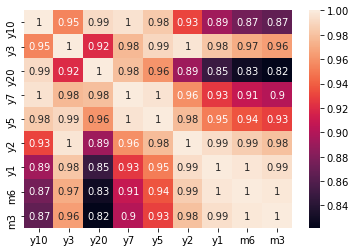

In [41]:
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [52]:
e = la.eig(corr_matrix)
e

(array([8.57186160e+00, 3.99149172e-01, 2.19946464e-02, 4.45064348e-03,
        1.47612565e-03, 5.11197366e-04, 8.98979450e-05, 2.63516302e-04,
        2.03201086e-04]),
 array([[ 0.33012795,  0.40201578, -0.09218768, -0.28670086,  0.65697297,
         -0.44028347, -0.08519627, -0.06422288, -0.04309174],
        [ 0.34063417, -0.05367031,  0.4252472 ,  0.14053549, -0.26058174,
         -0.1816913 , -0.7194186 , -0.1609138 , -0.19008291],
        [ 0.32045937,  0.53125321, -0.51548385,  0.4931627 , -0.30373791,
          0.06935662,  0.02763489, -0.06567027, -0.06324114],
        [ 0.33603324,  0.27710777,  0.17041108, -0.35615456, -0.15841487,
          0.35979746, -0.09182879,  0.60908405,  0.3470469 ],
        [ 0.33941634,  0.15280199,  0.34969515, -0.25808983, -0.11002632,
          0.34124306,  0.43312977, -0.5708269 , -0.1747961 ],
        [ 0.33902312, -0.17089415,  0.33314445,  0.33467859, -0.08636157,
         -0.46556048,  0.52129513,  0.36355809, -0.06881534],
        [ 0.33

In [64]:
ev = list(e[1])
norms = [la.norm(v) for v in ev]
pca = [x for x in range(3)]
for i in range(3):
    max_index = norms.index(max(norms)) 
    pca[i] = ev[max_index]
    del norms[max_index]
pca

[array([ 0.33012795,  0.40201578, -0.09218768, -0.28670086,  0.65697297,
        -0.44028347, -0.08519627, -0.06422288, -0.04309174]),
 array([ 0.33407083, -0.32562479,  0.00384773,  0.39275614,  0.38832759,
         0.25883233, -0.05644071, -0.21107257,  0.60213231]),
 array([ 0.33012795,  0.40201578, -0.09218768, -0.28670086,  0.65697297,
        -0.44028347, -0.08519627, -0.06422288, -0.04309174])]